**Import des fichiers via google drive**

In [ ]:
import os
import numpy
 
from google.colab import drive
from pathlib import Path
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation
from keras.utils import np_utils
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
 
 
working_dir = 'drive/MyDrive/Projet_IA' # chemin vers le dossier de travail 
data_dir='drive/MyDrive/Data_IA' # chemin vers le dossier data dans lequel sont déposés les dataset
 
def init_drive():
  # point de montage de google drive dans google colab
  drive.mount('drive', force_remount=True)
  # création du dossier de travail si celui-ci n'existe pas
  if not os.path.exists(working_dir):
    os.mkdir(working_dir)
 
init_drive()

Mounted at drive


**Mise en forme des listes**

In [ ]:
import csv
import numpy as np
#mise en forme des bases de données
def load_datatraj(filename):
  Data=[]
  with open("{}/{}.csv".format(data_dir,filename),newline='') as f:
    reader = csv.reader(f,delimiter=',')
    for row in reader:
        Data.append(row)
  return(Data)

#on imprime pour pouvoir observer la forme des listes
WB_Train=load_datatraj('WellBalanced_TrainSet')
print(np.shape(WB_Train))

R_Train=load_datatraj('Representative_TrainSet')
print(np.shape(R_Train))

for i in range(5):
  print(WB_Train[i])
print('\n')



for i in range (5):
  print(R_Train[i])
print('\n')

(240001, 10)
(190041, 8)
['', 'd', 'V init', 'A init', 'V max', 'A max', 'J max', 'Computation Time', 'Trajectory Time', 'Type']
['0', '1.389109462430585', '0.3008668264305069', '-0.1330992443612482', '0.55674464392251', '0.13339235631837895', '0.6802527256381324', '0.0013391971588134766', '5.194156431713527', '13.0']
['1', '1.4367443991963644', '-0.8154387299884486', '-0.21923437968257253', '0.8374613723010328', '0.6412069952273195', '0.46608249765730037', '0.0010459423065185547', '8.108824222885604', '14.0']
['2', '0.1857562494851308', '-0.14081001821299094', '-0.2275365945635316', '0.3121660428478126', '0.8893537865652973', '0.6012699436251457', '0.0009183883666992188', '3.443038436664688', '8.0']
['3', '-0.4129361363786339', '-0.09720940910816034', '0.007058463015909511', '0.10475813099172376', '0.21388530137215142', '0.6245550440242666', '0.0008175373077392578', '4.3667306584663965', '3.0']


['', 'd', 'V init', 'A init', 'V max', 'A max', 'J max', 'Type']
['0', '-1.0', '-0.777777

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.neural_network as nn

WB_Train_entree = []
WB_Train_sortie = []
#on convertit les éléments des listes en float
for i in range(1, len(WB_Train)):
  WB_Train_sortie += [float(WB_Train[i][-1])]

  Ls1 = []

  for j in range(1,len(WB_Train[0])-3):
    Ls1 += [float(WB_Train[i][j])]

  WB_Train_entree += [Ls1]



for i in range(10):
  print(WB_Train_sortie[i],WB_Train_entree[i])




13.0 [1.389109462430585, 0.3008668264305069, -0.1330992443612482, 0.55674464392251, 0.13339235631837895, 0.6802527256381324]
14.0 [1.4367443991963644, -0.8154387299884486, -0.21923437968257253, 0.8374613723010328, 0.6412069952273195, 0.46608249765730037]
8.0 [0.1857562494851308, -0.14081001821299094, -0.2275365945635316, 0.3121660428478126, 0.8893537865652973, 0.6012699436251457]
3.0 [-0.4129361363786339, -0.09720940910816034, 0.007058463015909511, 0.10475813099172376, 0.21388530137215142, 0.6245550440242666]
14.0 [1.3666157373633083, -0.4216393863279002, -0.7133843769724054, 0.9853054738562923, 0.8342310212075211, 0.4566910678944718]
6.0 [-1.0208634391053335, 0.29993832752059235, -0.25211164192819707, 0.4466754535031039, 0.7286357096993018, 0.6981324828625648]
8.0 [0.24177515044214726, 0.10978042432090696, -0.42285757475355934, 0.3322609305896898, 0.6091051231000234, 0.7322997702914207]
8.0 [1.1040811732661624, -0.15256788712319702, -0.3129675021505469, 0.8539368601055333, 0.469139913

In [ ]:
R_Train_entree = []
R_Train_sortie = []
#on convertit les éléments des listes en float
for i in range(1, len(R_Train)):
  R_Train_sortie += [float(R_Train[i][-1])]
  
  Ls = []
  for j in range(1,len(R_Train[0])-1):
    Ls += [float(R_Train[i][j])]
  
  R_Train_entree += [Ls]

for i in range(10):
  print(R_Train_sortie[i],R_Train_entree[i])

12.0 [-1.0, -0.7777777777777778, -0.5555555555555556, 1.0, 1.0, 1.0]
12.0 [-1.0, -0.7777777777777778, -0.5555555555555556, 1.0, 1.0, 0.9]
12.0 [-1.0, -0.7777777777777778, -0.5555555555555556, 1.0, 1.0, 0.8]
12.0 [-1.0, -0.7777777777777778, -0.5555555555555556, 1.0, 1.0, 0.7]
8.0 [-1.0, -0.7777777777777778, -0.33333333333333337, 1.0, 1.0, 1.0]
8.0 [-1.0, -0.7777777777777778, -0.33333333333333337, 1.0, 1.0, 0.9]
8.0 [-1.0, -0.7777777777777778, -0.33333333333333337, 1.0, 1.0, 0.8]
8.0 [-1.0, -0.7777777777777778, -0.33333333333333337, 1.0, 1.0, 0.7]
8.0 [-1.0, -0.7777777777777778, -0.33333333333333337, 1.0, 1.0, 0.6]
8.0 [-1.0, -0.7777777777777778, -0.33333333333333337, 1.0, 1.0, 0.5]


**Conversion des vecteurs**

Sans cette étape, l'algorithme ne se lance pas

In [ ]:
#Cette fonction permet de rapporter notre sortie composée de 16 valeurs par prédiction (certitude par classe) sur une matrice colonne indiquant uniquement la classe retenue
WB_Train_sortie_converted = np_utils.to_categorical(np.array(WB_Train_sortie), 16)
WB_Train_entree_converted = np.array(WB_Train_entree)
#Cette fonction permet de rapporter notre sortie composée de 16 valeurs par prédiction (certitude par classe) sur une matrice colonne indiquant uniquement la classe retenue
R_Train_sortie_converted = np_utils.to_categorical(np.array(R_Train_sortie), 16)
R_Train_entree_converted = np.array(R_Train_entree)

**Mise en place du Grid Search**

In [ ]:
#définition du modèle, les deux paramètres d'entrée de la fonction sont les variables du Grid Search
def create_model(neurons1=1,neurons2=1):
  model = Sequential()
  model.add(Dense(6, input_dim=6, activation='elu', name='Entree'))
  model.add(Dense(neurons1, activation='elu', name='Cachee1'))
  model.add(Dense(neurons2, activation='elu', name='Cachee2'))
  model.add(Dense(16, activation='softmax', name='Sortie'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

#fixation du seed de numpy.random pour obtenir des résultats reproductibles
seed = 7
numpy.random.seed(seed)

#définition des vecteurs d'entrée, en fonction de si l'on souhaite travailler avec un Well Balanced ou Representative dataset

#Well Balanced Train
X = WB_Train_entree_converted
Y = WB_Train_sortie_converted

'''
#Representative Train
X = R_Train_entree_converted
Y = R_Train_sortie_converted
'''

#génération du modèle
model = KerasClassifier(build_fn=create_model, epochs=200, batch_size=2048)

#définition des valeurs que va tester le grid search
neurons1 = [18,24,30,36,42,48,54]
neurons2 = [18,24,30,36,42,48,54]

#définition du dictionnaire
param_grid = dict(neurons1=neurons1,neurons2=neurons2)
#initiation du grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, verbose = 10)
grid_result = grid.fit(X, Y)

#affichage des résultats
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Fitting 3 folds for each of 49 candidates, totalling 147 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed: 18.2min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 22.9min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 31.6min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 39.5min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed: 50.2min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 60.5min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed: 74.6min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed: 87.2min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed: 103.5min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed: 119.1min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed: 

Epoch 1/200
118/118 [==============================] - 1s 6ms/step - loss: 2.0723 - accuracy: 0.3465
Epoch 2/200
118/118 [==============================] - 1s 6ms/step - loss: 1.1613 - accuracy: 0.6012
Epoch 3/200
118/118 [==============================] - 1s 6ms/step - loss: 0.8763 - accuracy: 0.6923
Epoch 4/200
118/118 [==============================] - 1s 6ms/step - loss: 0.7740 - accuracy: 0.7267
Epoch 5/200
118/118 [==============================] - 1s 6ms/step - loss: 0.7117 - accuracy: 0.7481
Epoch 6/200
118/118 [==============================] - 1s 6ms/step - loss: 0.6627 - accuracy: 0.7641
Epoch 7/200
118/118 [==============================] - 1s 6ms/step - loss: 0.6195 - accuracy: 0.7789
Epoch 8/200
118/118 [==============================] - 1s 6ms/step - loss: 0.5802 - accuracy: 0.7928
Epoch 9/200
118/118 [==============================] - 1s 6ms/step - loss: 0.5446 - accuracy: 0.8053
Epoch 10/200
118/118 [==============================] - 1s 6ms/step - loss: 0.5128 - accura

**Exploitation des résultats**

In [ ]:
import pandas

df = pandas.DataFrame(grid.cv_results_)

df["neurons1"] = df.params.apply(lambda x: x["neurons1"])
df["neurons2"] = df.params.apply(lambda x: x["neurons2"])

df=df.sort_values(by=['neurons2'])

print(df)

res = [df.columns.values.tolist()] + df.values.tolist()
print(res)

res.pop(0)
print(res)


    mean_fit_time  std_fit_time  ...  neurons1  neurons2
0       84.809338      0.926801  ...        18        18
21      97.887113      0.936402  ...        36        18
28     101.528758      0.208443  ...        42        18
42     114.170599      0.559994  ...        54        18
7       84.887053      0.516481  ...        24        18
35     102.213941      0.332413  ...        48        18
14      95.956344      1.047448  ...        30        18
1       86.496177      0.897199  ...        18        24
29     112.046793      0.723004  ...        42        24
43     119.922116      0.706156  ...        54        24
8       86.693134      0.508099  ...        24        24
22      99.462571      2.926552  ...        36        24
36     110.594730      0.752635  ...        48        24
15      97.734381      0.627559  ...        30        24
30     123.416567      0.654718  ...        42        30
16     105.865011      0.606893  ...        30        30
37     120.152679      0.242772

In [ ]:
#définition des listes à exploiter

accuracy = []
accuracyfittime = []
accuracytesttime = []
testtime = []

for j in range(len(neurons2)):
  a = []
  b = []
  c = []
  d = []
  for i in range (len(neurons1)):
    a+=[res[j*len(neurons1)+i][10]*100]
    b+=[res[j*len(neurons1)+i][10]/res[i][0]]
    c+=[res[j*len(neurons1)+i][10]/res[i][2]]
    d+=[res[j*len(neurons1)+i][2]]
  accuracy += [a]
  accuracyfittime += [b]
  accuracytesttime += [c]
  testtime += [d]

print(accuracy)
print(accuracyfittime)
print(accuracytesttime)
print(testtime)

[[88.68416746457419, 90.71458379427591, 91.0520831743876, 90.7575011253357, 89.54458435376486, 90.91625014940897, 90.68416555722555], [89.95291590690613, 92.04708337783813, 92.49666730562845, 90.93666672706604, 91.7329172293345, 91.85374975204468, 91.1845842997233], [92.13124910990396, 91.54250025749207, 92.80624985694885, 91.69333378473917, 92.64875054359436, 90.32291571299234, 91.47250056266785], [92.74374842643738, 93.07541648546854, 92.73250102996826, 92.39458243052164, 91.18499954541525, 92.20249851544699, 90.97874959309897], [92.76708364486694, 93.37208271026611, 91.6433334350586, 91.81625048319498, 93.32499901453653, 93.39625040690103, 92.22583373387656], [91.59166614214578, 93.58833432197571, 91.83458288510641, 93.3662494023641, 92.68874923388162, 93.06833346684775, 93.05791854858398], [92.75499979654947, 93.54666670163473, 93.68416468302408, 92.365833123525, 92.60083436965942, 93.2366669178009, 93.98958285649618]]
[[0.01045688713355337, 0.009267265227666606, 0.0089681076639367

In [ ]:
#définition des labels des graphs

X = np.arange(len(neurons1))
width1 = float(1/(2*len(neurons1)))
labeln1 = []
labeln2 = []

for i in range (len(neurons1)):
  labeln1 += ['n1 = ' + str(neurons1[i])]

for i in range (len(neurons2)):
  labeln2 += ['n2 = ' + str(neurons2[i])]

[]

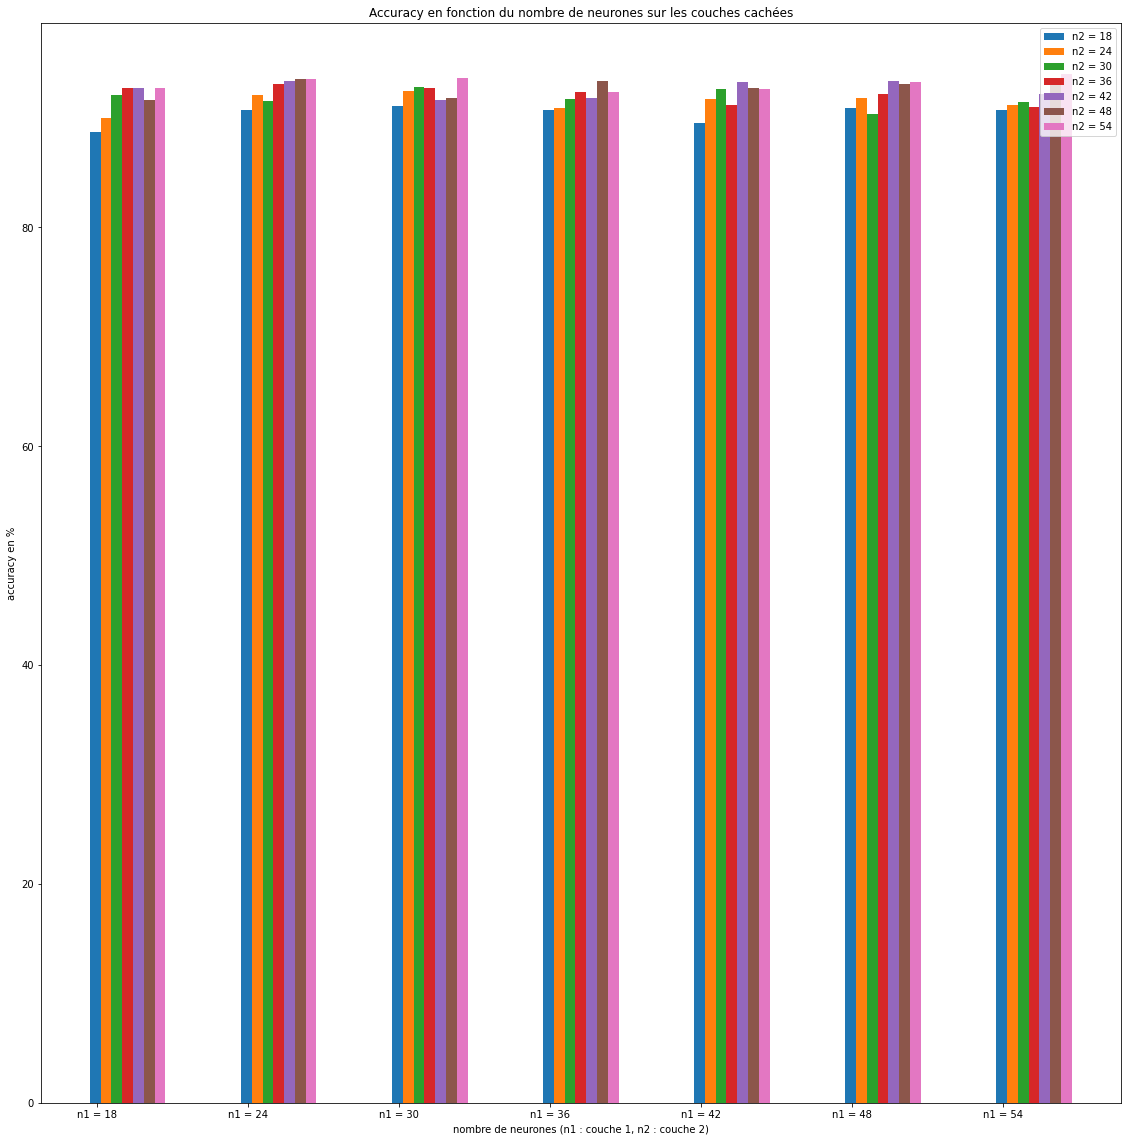

In [ ]:
# accuracy
fig = plt.figure(figsize=(15,15))
ax = fig.add_axes([0,0,1,1])

for i in range(len(neurons2)):
  ax.bar(X + float(i)*0.5/float(len(neurons2)), accuracy[i], width=width1)

ax.set_title('Accuracy en fonction du nombre de neurones sur les couches cachées')
ax.set_xlabel("nombre de neurones (n1 : couche 1, n2 : couche 2)")
ax.set_ylabel("accuracy en %")
ax.legend(labels=labeln2)
plt.xticks([i + width1 / len(neurons2) for i in range(len(neurons1))],labeln1)

plt.plot()

[]

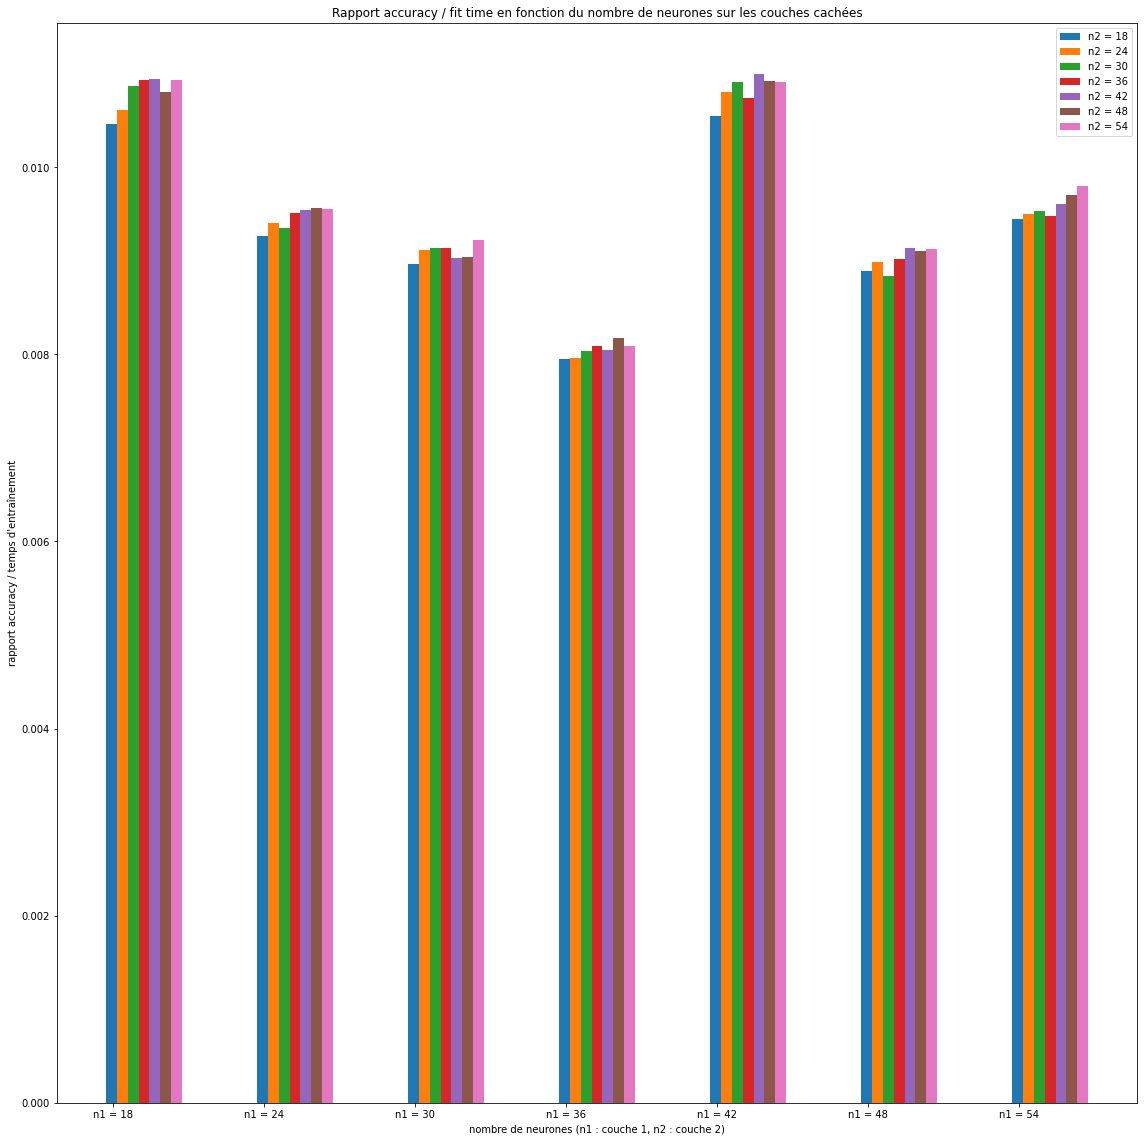

In [ ]:
# accuracy/tempstrain
fig = plt.figure(figsize=(15,15))
ax = fig.add_axes([0,0,1,1])

for i in range(len(neurons2)):
  ax.bar(X + float(i)*0.5/float(len(neurons2)), accuracyfittime[i], width=width1)

ax.set_title('Rapport accuracy / fit time en fonction du nombre de neurones sur les couches cachées')
ax.set_xlabel("nombre de neurones (n1 : couche 1, n2 : couche 2)")
ax.set_ylabel("rapport accuracy / temps d'entraînement")
ax.legend(labels=labeln2)
plt.xticks([i + width1 / len(neurons2) for i in range(len(neurons1))],labeln1)

plt.plot()

[]

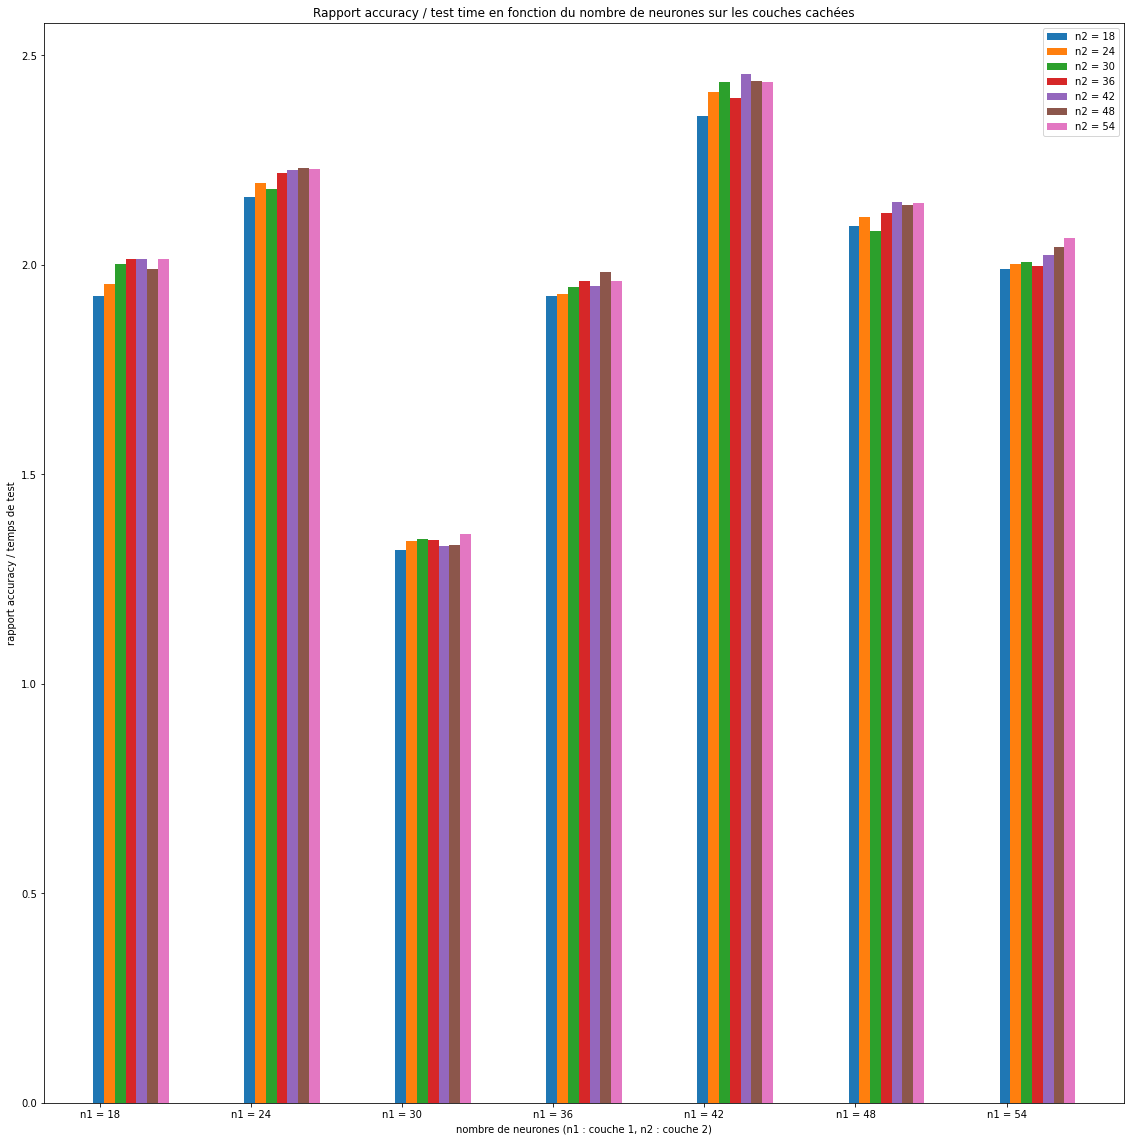

In [ ]:
# accuracy/tempstest
fig = plt.figure(figsize=(15,15))
ax = fig.add_axes([0,0,1,1])

for i in range(len(neurons2)):
  ax.bar(X + float(i)*0.5/float(len(neurons2)), accuracytesttime[i], width=width1)

ax.set_title('Rapport accuracy / test time en fonction du nombre de neurones sur les couches cachées')
ax.set_xlabel("nombre de neurones (n1 : couche 1, n2 : couche 2)")
ax.set_ylabel("rapport accuracy / temps de test")
ax.legend(labels=labeln2)
plt.xticks([i + width1 / len(neurons2) for i in range(len(neurons1))],labeln1)

plt.plot()

[]

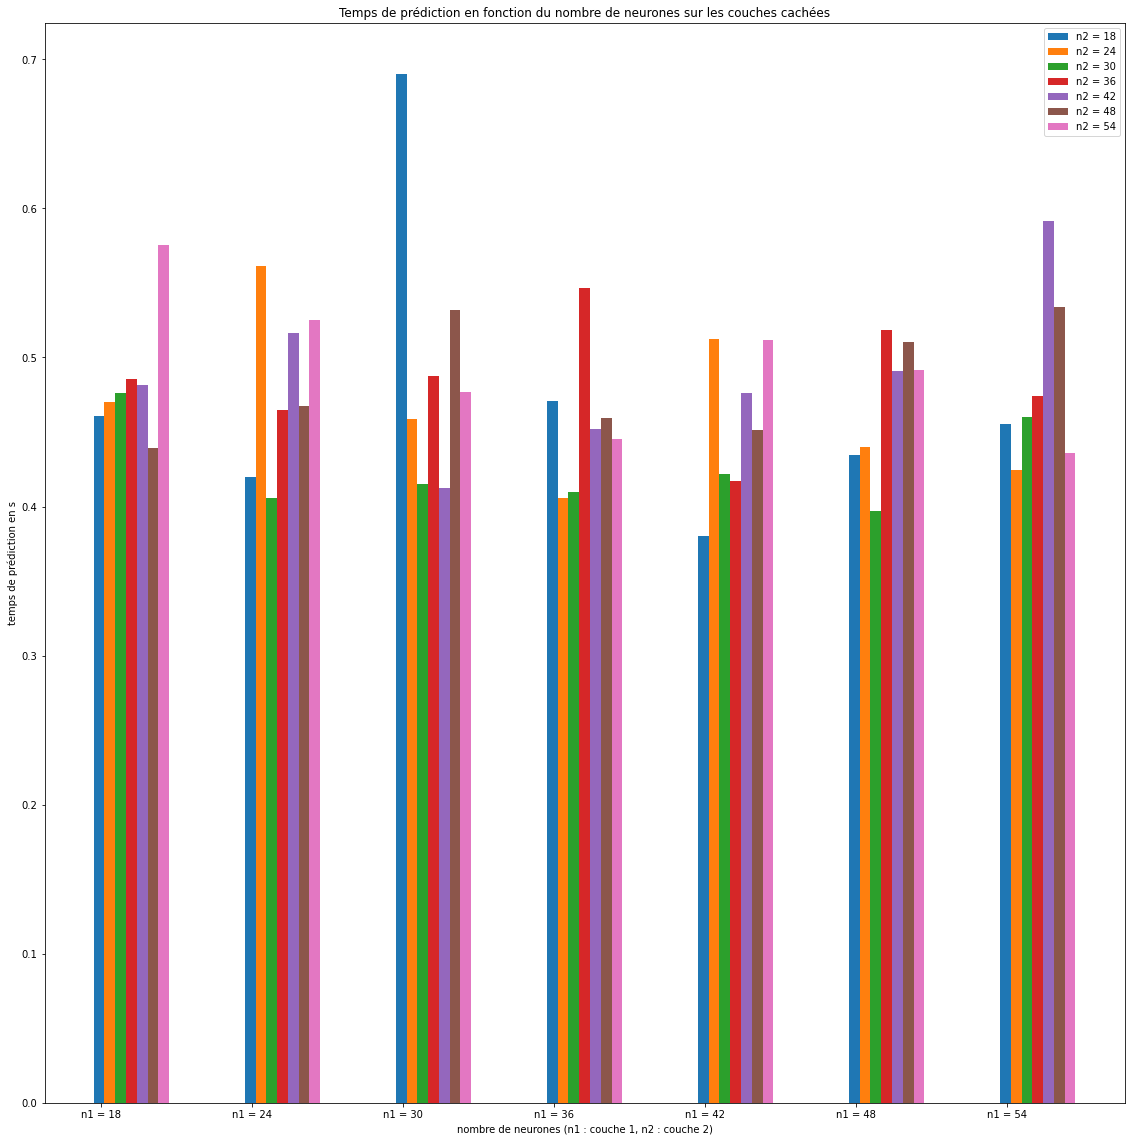

In [ ]:
# testtime
fig = plt.figure(figsize=(15,15))
ax = fig.add_axes([0,0,1,1])

for i in range(len(neurons2)):
  ax.bar(X + float(i)*0.5/float(len(neurons2)), testtime[i], width=width1)

ax.set_title('Temps de prédiction en fonction du nombre de neurones sur les couches cachées')
ax.set_xlabel("nombre de neurones (n1 : couche 1, n2 : couche 2)")
ax.set_ylabel("temps de prédiction en s")
ax.legend(labels=labeln2)
plt.xticks([i + width1 / len(neurons2) for i in range(len(neurons1))],labeln1)

plt.plot()